In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import arviz as az
from sklearn.linear_model import LogisticRegression
import pymc as pm

## The Dataset

You can download the dataset from here: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [3]:
## 1 point

## ToDo: read the csv file into a dataframe and show the first 5 rows
diab_df = pd.read_csv('/content/sample_data/diabetes.csv')
diab_df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
## 3 points

## Assign the Outcome variable to y and the rest to X.
## Use LogisticRegression to fit the data and print out the intercept and the coefficients

from sklearn.linear_model import LogisticRegression
X = diab_df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y = diab_df.Outcome
log_reg = LogisticRegression()
clf = log_reg.fit(X, y)

print("The coefficients are: \n",clf.coef_)
print("The intercept is: \n",clf.intercept_)


The coefficients are: 
 [[ 1.17252342e-01  3.35998330e-02 -1.40873785e-02 -1.27048112e-03
  -1.24032092e-03  7.72023486e-02  1.41904173e+00  1.00353713e-02]]
The intercept is: 
 [-7.70291291]


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
## 2 points

## Explain what the code is doing:
## What are the prior probabilities of the intercept and coefficients?
# Which likelihood distribution has been used?
## What does pm.invlogit(linreg) mean?
## What is map_est?

with pm.Model() as logreg_model:
  
    w0 = pm.Normal('w0', mu=0, sigma=100)
    w1 = pm.Normal('w1', mu=0, sigma=100)
    w2 = pm.Normal('w2', mu=0, sigma=100)
    w3 = pm.Normal('w3', mu=0, sigma=100)
    w4 = pm.Normal('w4', mu=0, sigma=100)
    w5 = pm.Normal('w5', mu=0, sigma=100)
    w6 = pm.Normal('w6', mu=0, sigma=100)
    w7 = pm.Normal('w7', mu=0, sigma=100)
    w8 = pm.Normal('w8', mu=0, sigma=100)

    
    linreg = w0 * np.ones(diab_df.shape[0]) + w1 * diab_df.Pregnancies.values + w2 * diab_df.Glucose.values \
    + w3 * diab_df.BloodPressure.values + w4 * diab_df.SkinThickness.values + w5 * diab_df.Insulin.values + \
    w6 * diab_df.BMI.values + w7 * diab_df.DiabetesPedigreeFunction.values + w8 * diab_df.Age.values
    p_outcome = pm.invlogit(linreg)

    likelihood = pm.Bernoulli('likelihood', p_outcome, observed=diab_df.Outcome.values)

    
    map_est= pm.find_MAP()
    print(map_est)


{'w0': array(-8.40166888), 'w1': array(0.12311865), 'w2': array(0.0351519), 'w3': array(-0.01329542), 'w4': array(0.00061588), 'w5': array(-0.0011909), 'w6': array(0.0896803), 'w7': array(0.94448272), 'w8': array(0.01486235)}


## Explain what the code is doing:
The whole process performs approximate Bayesian inference for logistic regression.
## What are the prior probabilities of the intercept and coefficients?
w0 represents the prior probabilities of intercept, w1,w2,w3,w4,w5,w6,w7,
w8 represent the prior probablities of coefficients. All these prior
probabilities are in normal distribution with mean=0 and sd(standard deviation)=100.
## Which likelihood distribution has been used?
Bernoulli
## What does pm.invlogit(linreg) mean?
pm.invlogit() function gives the inverse of the logit function, i.e.
1/(1 + exp(-x)). Therefore, pm.invlogit(linreg) returns logistic 
function(probability) of linreg(which combines the parameters with the data) which is between 0 and 1.
## What is map_est?
It finds the local maximum a posteriori point given a model.

array([[<Axes: title={'center': 'w0'}>, <Axes: title={'center': 'w1'}>,
        <Axes: title={'center': 'w2'}>],
       [<Axes: title={'center': 'w3'}>, <Axes: title={'center': 'w4'}>,
        <Axes: title={'center': 'w5'}>],
       [<Axes: title={'center': 'w6'}>, <Axes: title={'center': 'w7'}>,
        <Axes: title={'center': 'w8'}>]], dtype=object)

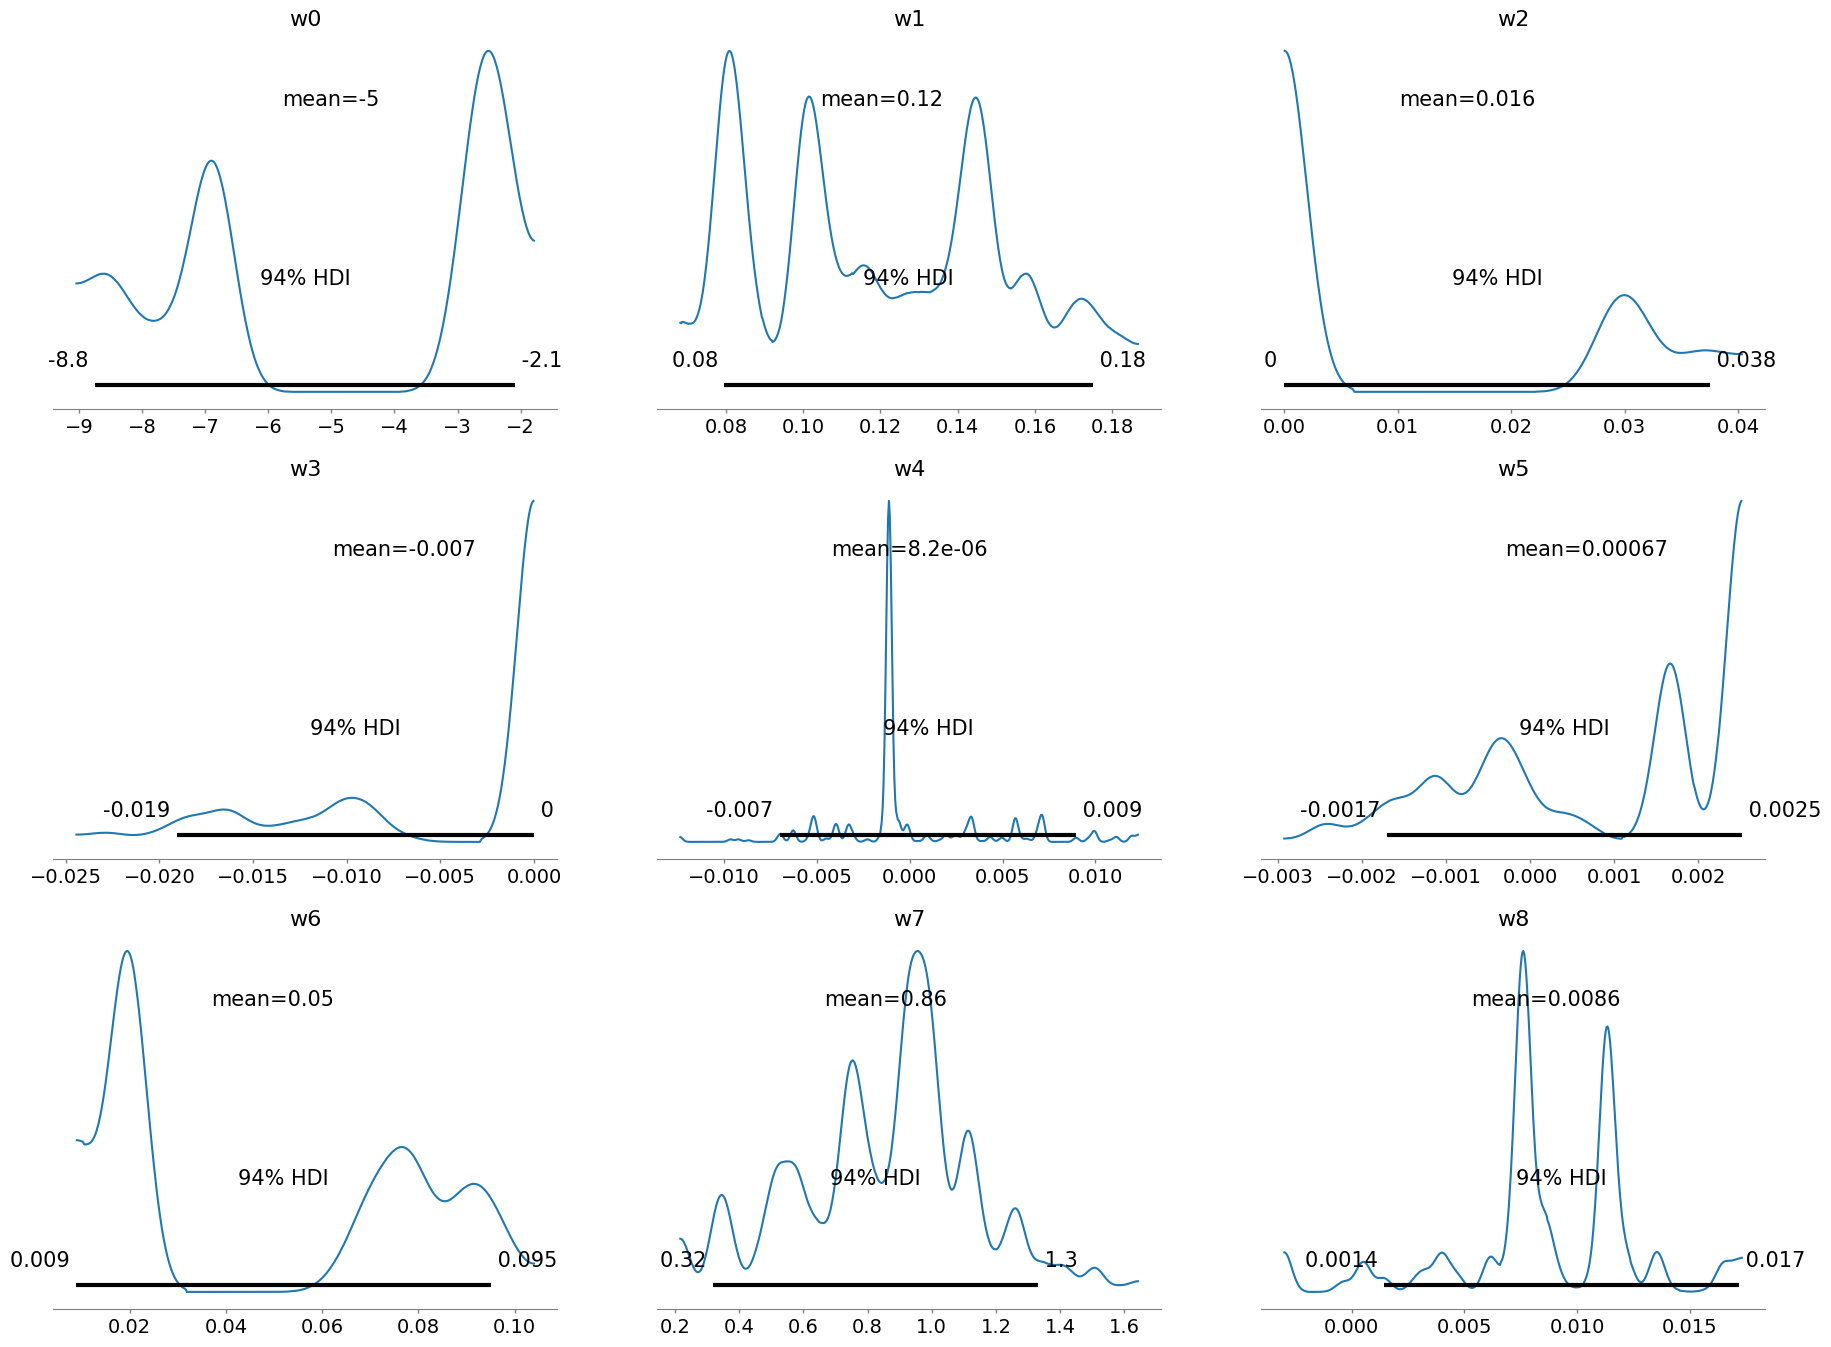

In [ ]:
## 2 points

with logreg_model:
## ToDo: draw 400 samples using pm.Metropolis() and assign to the variable trace
  trace = pm.sample(400, step=pm.Metropolis())
## Explain the output of the plot 
az.plot_posterior(trace) 

The output generates a posterior distribution plot for the model 
parameters w0,w1,...,w8.

For each plot, the x-axis(solid black line) represents the 
possible parameter values and y-axis represents the corresponding 
density of those values.

The plot also shows 94% Highest Density Interval(HDI) and the mean
of the parameter in its posterior distribution.

By those plots, we can see the visual representation of the uncertainty
in the model parameters and check the performance with the model.